In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import trade_data
from passivbot import load_settings
from backtester import *

In [3]:
plt.rcParams['figure.figsize'] = [21, 13]
pd.set_option('precision', 10)

In [4]:
settings = load_settings('default')
settings

{'quot': 'BTC',
 'coins_long': ['ADA',
  'ATOM',
  'BAT',
  'BCH',
  'BNB',
  'DASH',
  'EOS',
  'ETC',
  'ETH',
  'IOST',
  'IOTA',
  'LINK',
  'LTC',
  'MATIC',
  'NEO',
  'ONT',
  'QTUM',
  'RVN',
  'TRX',
  'VET',
  'XLM',
  'XMR',
  'XRP',
  'XTZ',
  'ZEC'],
 'coins_shrt': ['ADA',
  'ATOM',
  'BAT',
  'BCH',
  'DASH',
  'EOS',
  'ETC',
  'ETH',
  'IOST',
  'IOTA',
  'LINK',
  'LTC',
  'MATIC',
  'NEO',
  'ONT',
  'QTUM',
  'RVN',
  'TRX',
  'VET',
  'XLM',
  'XMR',
  'XRP',
  'XTZ',
  'ZEC'],
 'do_not_borrow': [],
 'profit_pct': 0.0025,
 'account_equity_pct_per_trade': 0.0001,
 'account_equity_pct_per_hour': 0.000384,
 'hours_rolling_small_trade_window': 1.0,
 'bnb_buffer': 25.3,
 'max_memory_span_days': 120,
 'snapshot_timestamp_millis': 1590028701584,
 'ema_spans_minutes': [15, 25, 40, 64, 102, 164, 263, 421, 675, 1080],
 'coins': ['ADA',
  'ATOM',
  'BAT',
  'BCH',
  'BNB',
  'DASH',
  'EOS',
  'ETC',
  'ETH',
  'IOST',
  'IOTA',
  'LINK',
  'LTC',
  'MATIC',
  'NEO',
  'ONT',


In [5]:
# ema spans
'''
p = 1.65
max_span = 60 * 36
n = 11
spans = np.array([p**i for i in range(n)])
spans = list((spans / spans.max() * max_span).round().astype(int))
spans
'''

'\np = 1.65\nmax_span = 60 * 36\nn = 11\nspans = np.array([p**i for i in range(n)])\nspans = list((spans / spans.max() * max_span).round().astype(int))\nspans\n'

In [6]:
fee = 1 - 0.0675 * 0.01 # vip1


# modify settings here

#settings['hours_rolling_small_trade_window'] = 1.0
#settings['ema_spans_minutes'] = spans
#settings['profit_pct'] = 0.0025

#settings['account_equity_pct_per_trade'] = 0.0002

#settings['account_equity_pct_per_hour'] = 0.000389

#settings['max_memory_span_days'] = 120

#settings['coins_long'] = []
#settings['coins_shrt'] = []

#settings['exponent'] = 15

#settings['ema_spans_minutes'] = [15, 25, 40, 64, 102, 164, 263, 421, 675, 1080]
print(settings['account_equity_pct_per_trade'] * 60)

0.006


In [7]:
symbols = [f'{c}/BTC' for c in set(settings['coins_long'] + settings['coins_shrt'])]
symbols = sorted(symbols)
n_days = 30 * 3
#symbols = [s for s in symbols if not any(s.startswith(c) for c in ['VET', 'IOST'])]
symbols

['ADA/BTC',
 'ATOM/BTC',
 'BAT/BTC',
 'BCH/BTC',
 'BNB/BTC',
 'DASH/BTC',
 'EOS/BTC',
 'ETC/BTC',
 'ETH/BTC',
 'IOST/BTC',
 'IOTA/BTC',
 'LINK/BTC',
 'LTC/BTC',
 'MATIC/BTC',
 'NEO/BTC',
 'ONT/BTC',
 'QTUM/BTC',
 'RVN/BTC',
 'TRX/BTC',
 'VET/BTC',
 'XLM/BTC',
 'XMR/BTC',
 'XRP/BTC',
 'XTZ/BTC',
 'ZEC/BTC']

In [8]:
# set no_download to True to load faster if already downloaded ohlcvs
high_low_means = load_hlms(symbols, n_days, no_download=False)

In [9]:
df = add_emas(high_low_means, settings['ema_spans_minutes'])
print(f'n_days {(df.index[-1] - df.index[0]) / 1000 / 60 / 60 / 24:2f}')

n_days 94.590278


In [10]:
balance_list, lentr, sentr, lexit, sexit, lexitpl, sexitpl = backtest(df, settings)

{'RVN_BTC', 'IOST_BTC', 'ETH_BTC', 'LTC_BTC', 'BCH_BTC', 'XMR_BTC', 'TRX_BTC', 'XLM_BTC', 'ZEC_BTC', 'IOTA_BTC', 'VET_BTC', 'ADA_BTC', 'MATIC_BTC', 'BAT_BTC', 'LINK_BTC', 'EOS_BTC', 'ETC_BTC', 'DASH_BTC', 'XTZ_BTC', 'QTUM_BTC', 'ONT_BTC', 'XRP_BTC', 'NEO_BTC', 'ATOM_BTC', 'BNB_BTC'}
{'RVN_BTC', 'IOST_BTC', 'ETH_BTC', 'LTC_BTC', 'BCH_BTC', 'XMR_BTC', 'TRX_BTC', 'XLM_BTC', 'ZEC_BTC', 'IOTA_BTC', 'VET_BTC', 'ADA_BTC', 'MATIC_BTC', 'BAT_BTC', 'LINK_BTC', 'EOS_BTC', 'ETC_BTC', 'DASH_BTC', 'XTZ_BTC', 'QTUM_BTC', 'ONT_BTC', 'XRP_BTC', 'NEO_BTC', 'ATOM_BTC'}
100.00% acc equity quot: 0.573133  avg daily gain: 0.994133 

In [13]:
# balances are in terms of quot
bldf = pd.DataFrame([e for e in balance_list[::10]]).set_index('timestamp')

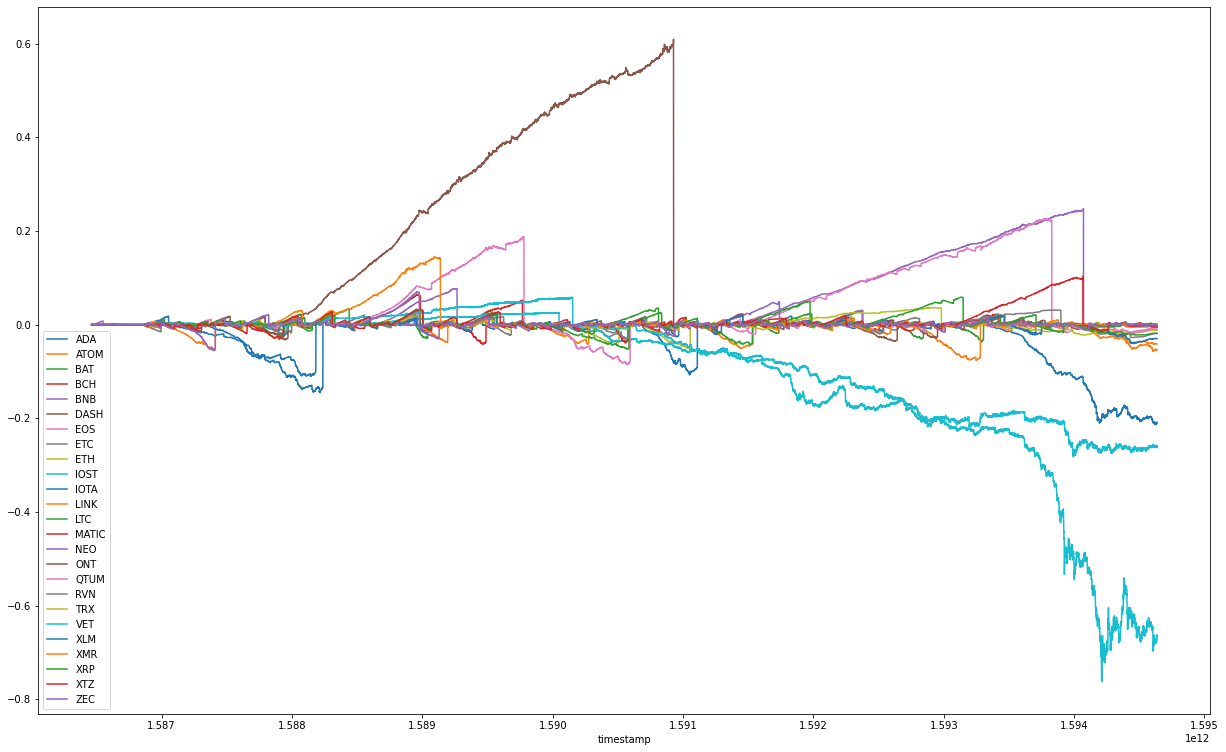

In [14]:
bldf.drop(['acc_equity_quot', 'acc_debt_quot', 'BTC'], axis=1).plot()

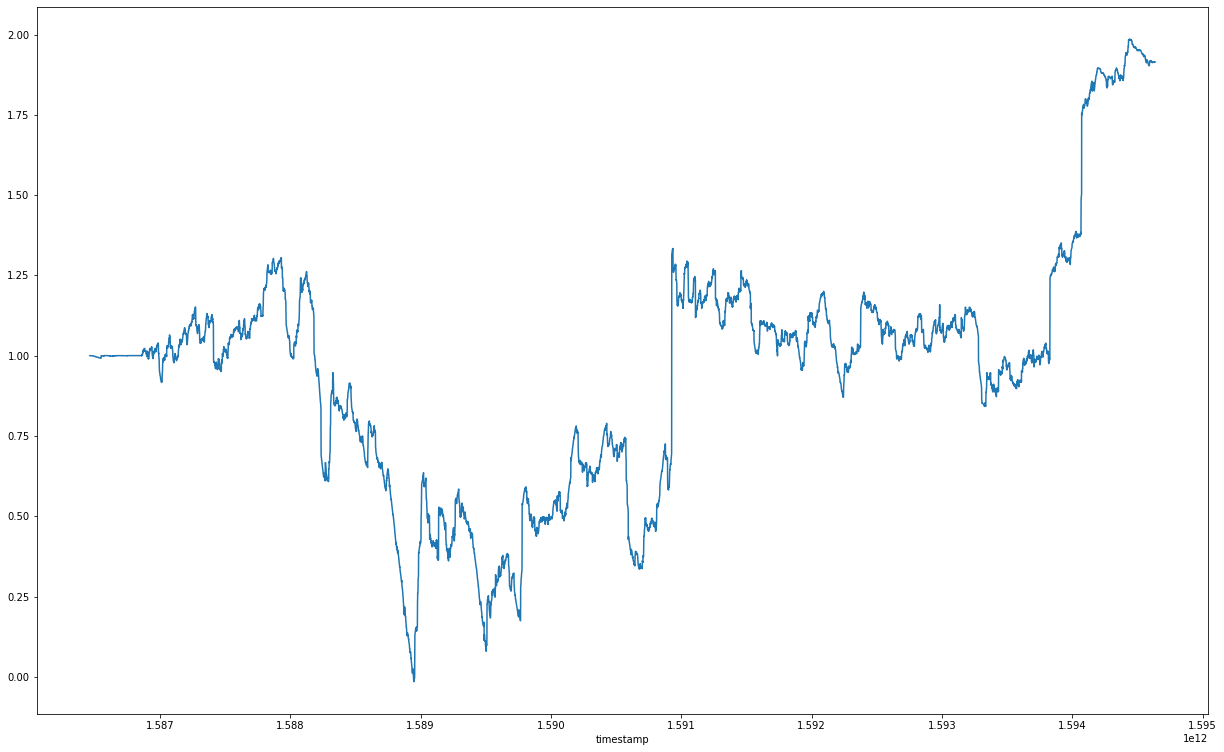

In [15]:
bldf.BTC.plot()

               ndays 94.59
start end daily gain 0.99413257
      max daily gain 1.0005103436460385
      low water mark 0.5015108279276974
     high water mark 1.0289470637036058
                 end 0.5731333511898051
                mean 0.9622028566192437
         yearly gain 1.2046967972343674
        polyfit gain 0.9978375175288787
            ema gain 0.9990324077601453


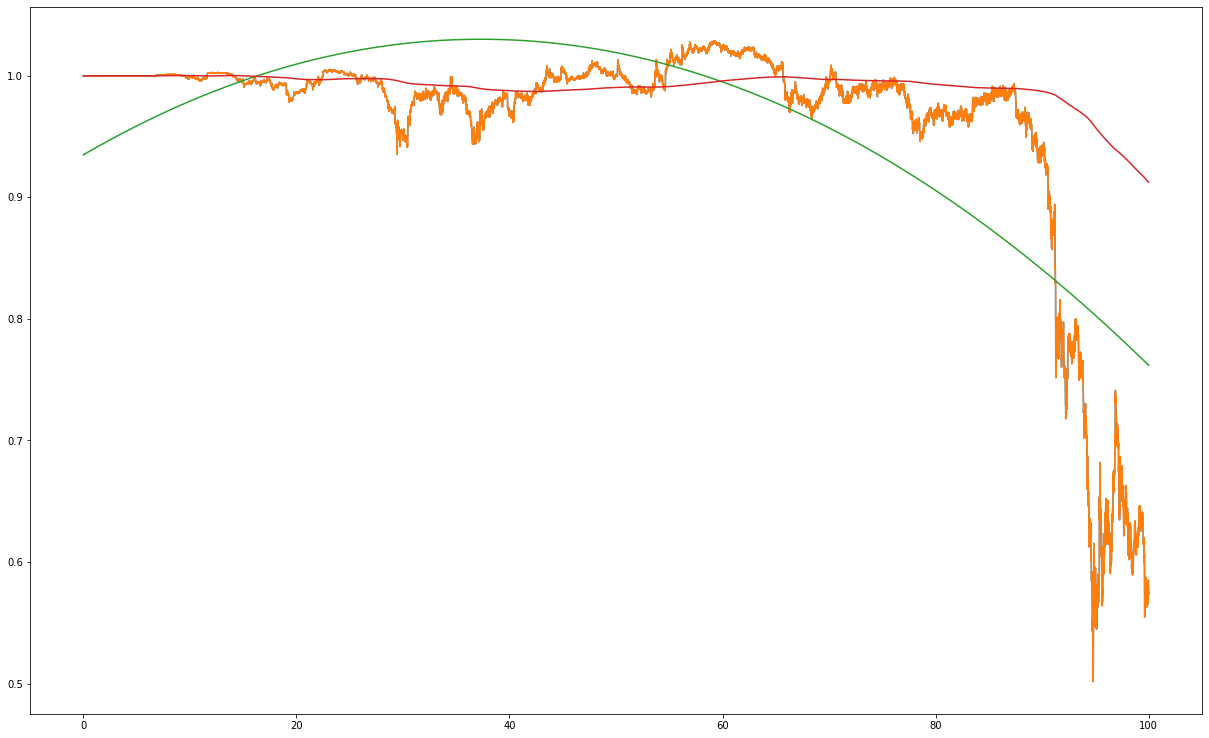

In [16]:
start_equity = bldf.acc_equity_quot.iloc[0]
end_equity = bldf.acc_equity_quot.iloc[-1]
n_days = (bldf.index[-1] - bldf.index[0]) / 1000 / 60 / 60 / 24
avg_daily_gain = (end_equity / start_equity)**(1 / n_days)
hwme = bldf.acc_equity_quot.max()
hwmi = bldf.acc_equity_quot.idxmax()
n_days_hwm = (hwmi - bldf.index[0]) / 1000 / 60 / 60 / 24
ideal_daily_gain = (hwme / start_equity)**(1 / n_days_hwm)
plt.plot(np.linspace(0, 100, len(bldf)), bldf.acc_equity_quot.values)


print('               ndays', round(n_days, 2))
print('start end daily gain', round(avg_daily_gain, 8))
print('      max daily gain', ideal_daily_gain)
print('      low water mark', bldf.acc_equity_quot.min())
print('     high water mark', hwme)
print('                 end', bldf.acc_equity_quot.iloc[-1])
print('                mean', bldf.acc_equity_quot.mean())
print('         yearly gain', ideal_daily_gain ** 365)

xs = np.linspace(0, 100, len(bldf))
plt.plot(xs, bldf.acc_equity_quot.values)
pfn = np.poly1d(np.polyfit(xs, bldf.acc_equity_quot.values, 2))
ys = pfn(xs)
plt.plot(xs, ys)
wema = bldf.acc_equity_quot.ewm(span=10000).mean().values
plt.plot(xs, wema)
print('        polyfit gain', (ys[-1] / ys[0])**(1 / n_days))
print('            ema gain', (wema[-1] / wema[0])**(1 / n_days))



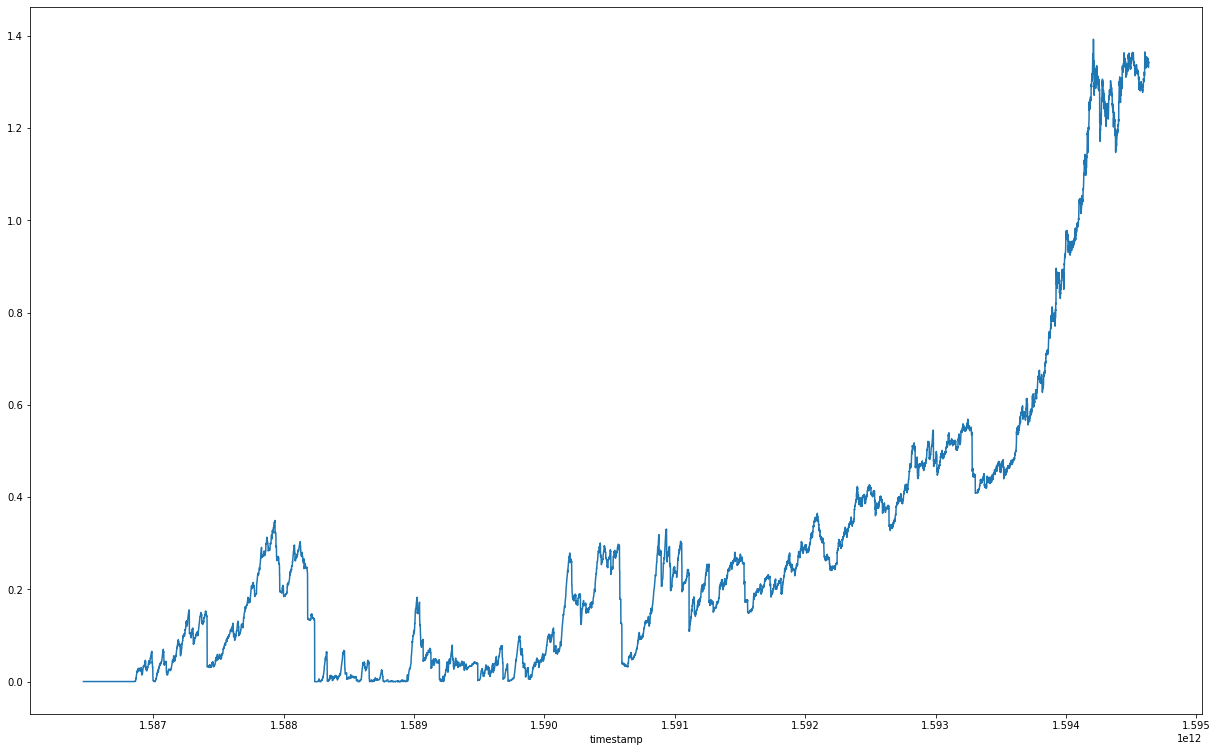

In [17]:
bldf.acc_debt_quot.plot()

In [18]:
# bag status at end
sorted([(round(e[1], 6), e[0]) for e in dict(bldf.iloc[-1]).items() if 'acc' not in e[0]])

[(-0.673783, 'VET'),
 (-0.261947, 'IOST'),
 (-0.208339, 'ADA'),
 (-0.053602, 'LINK'),
 (-0.041455, 'ATOM'),
 (-0.0296, 'XLM'),
 (-0.018962, 'ETC'),
 (-0.018325, 'LTC'),
 (-0.01202, 'ETH'),
 (-0.009784, 'QTUM'),
 (-0.006914, 'EOS'),
 (-0.005275, 'XTZ'),
 (-0.003514, 'RVN'),
 (0.0, 'BAT'),
 (0.0, 'BCH'),
 (0.0, 'DASH'),
 (0.0, 'MATIC'),
 (0.0, 'ONT'),
 (0.0, 'XMR'),
 (0.0, 'XRP'),
 (0.0, 'ZEC'),
 (1e-06, 'NEO'),
 (5e-06, 'IOTA'),
 (0.000403, 'BNB'),
 (0.001607, 'TRX'),
 (1.914638, 'BTC')]

In [19]:
r = {}
for s in map(lambda x: x.replace('/', '_'), symbols):
    # all buys
    try:
        abdf = pd.DataFrame(sorted(lentr[s] + sexit[s], key=lambda x: x['timestamp'])).set_index('timestamp')
    except:
        print(s, 'no buys')
        abdf = None
    # all sels
    try:
        asdf = pd.DataFrame(sorted(sentr[s] + lexit[s], key=lambda x: x['timestamp'])).set_index('timestamp')
    except:
        print(s, 'no sels')
        asdf = None
    if abdf is None or asdf is None:
        continue
    buy_cost = (abdf.price * abdf.amount).sum()
    sel_cost = (asdf.price * asdf.amount).sum()
    sum_cost = buy_cost + sel_cost
    buy_vwap = buy_cost / abdf.amount.sum()
    sel_vwap = sel_cost / asdf.amount.sum()
    diff = (sel_vwap / buy_vwap) * fee**2
    approx_profit = buy_cost * (diff * fee**2 - 1)
    r[s] = {'vol': sum_cost, 'svwap / bvwap': sel_vwap / buy_vwap,
            'vol * (sel_vwap / buy_vwap * fee**2 - 1)': sum_cost * (sel_vwap / buy_vwap * fee**2 - 1)}

sum_vol = sum(r[s]['vol'] for s in r)
print('sum vol', sum_vol)
print('monthly vol', sum_vol / n_days * 30)
rdf = pd.DataFrame(r).T.sort_values('vol * (sel_vwap / buy_vwap * fee**2 - 1)')
print('sum', rdf['vol * (sel_vwap / buy_vwap * fee**2 - 1)'].sum())
rdf

sum vol 43.73197325262344
monthly vol 13.86991589834324
sum 0.475265545173079


,vol,svwap / bvwap,vol * (sel_vwap / buy_vwap * fee**2 - 1)
ETC_BTC,1.9407936951,1.0016323815,0.0005446530
LTC_BTC,1.9252780308,1.0020506687,0.0013445310
BNB_BTC,1.2525022586,1.0028124577,0.0018275483
EOS_BTC,2.1839488412,1.0023581850,0.0021958691
TRX_BTC,0.6356016294,1.0051631460,0.0024195026
XRP_BTC,1.8295328903,1.0031282006,0.0032463864
BCH_BTC,2.0116291752,1.0030671076,0.0034467738
XMR_BTC,2.1369082396,1.0031222100,0.0037790197
DASH_BTC,2.6975038572,1.0029257301,0.0042411164
ETH_BTC,1.9917049015,1.0035421428,0.0043574882


In [20]:
# analyze particular symbol
s = 'VET_BTC'

In [21]:
try:
    ledf = pd.DataFrame(lentr[s]).set_index('timestamp')
    lexitdf = pd.DataFrame(lexit[s]).set_index('timestamp')
    lexitpdf = pd.DataFrame(lexitpl[s]).set_index('timestamp')
    did_long = True
except:
    print('no longs', s)
    did_long = False
try:
    sedf = pd.DataFrame(sentr[s]).set_index('timestamp')
    sexitdf = pd.DataFrame(sexit[s]).set_index('timestamp')
    sexitpdf = pd.DataFrame(sexitpl[s]).set_index('timestamp')   
    did_shrt = True
except:
    print('no shorts', s)
    did_shrt = False

In [22]:
# longest bag durations
d = 1000 * 60 * 60 * 24
if did_long:
    for e in sorted(np.diff(np.append(lexitdf.index, ledf.index[-1]) / d))[-10:]:
        print('long bag duration days', round(e, 2))
print()
if did_shrt:
    for e in sorted(np.diff(np.append(sexitdf.index, sedf.index[-1]) / d))[-10:]:
        print('shrt bag duration days', round(e, 2))

long bag duration days 2.57
long bag duration days 2.62
long bag duration days 2.91
long bag duration days 2.91
long bag duration days 3.05
long bag duration days 3.55
long bag duration days 3.66
long bag duration days 3.68
long bag duration days 5.37
long bag duration days 25.96

shrt bag duration days 0.76
shrt bag duration days 1.29
shrt bag duration days 2.23
shrt bag duration days 2.3
shrt bag duration days 3.72
shrt bag duration days 4.47
shrt bag duration days 4.7
shrt bag duration days 4.8
shrt bag duration days 8.51
shrt bag duration days 53.18


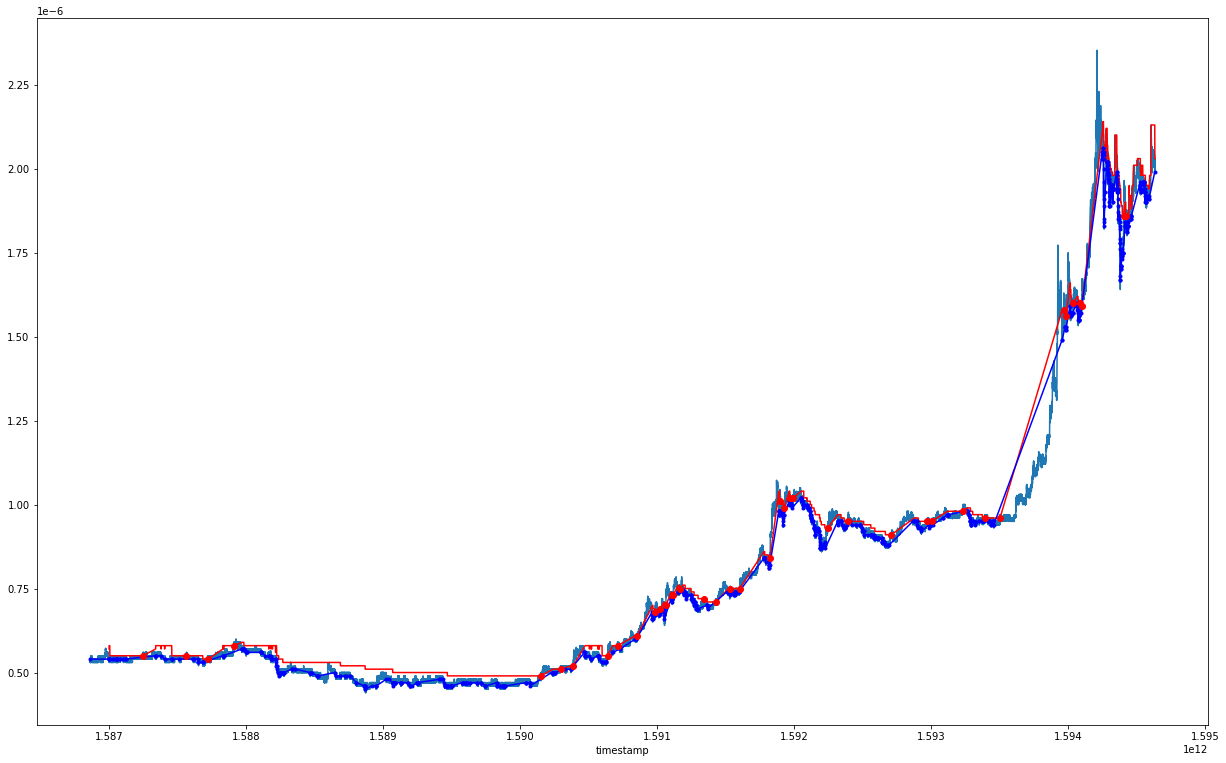

In [23]:
if did_long:
    high_low_means[s + '_mean'].plot()
    lexitpdf.price.plot(style='r-')
    ledf.price.plot(style='b.-')
    lexitdf.price.plot(style='ro')

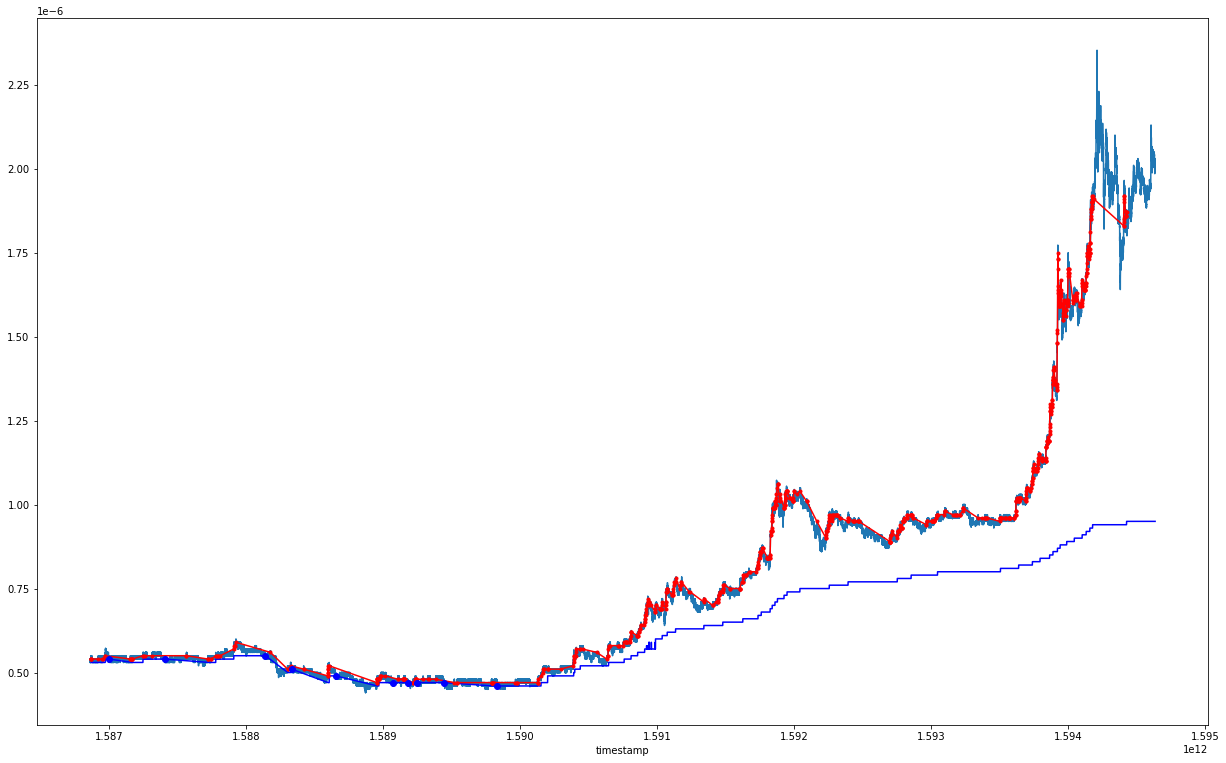

In [24]:
if did_shrt:
    high_low_means[s + '_mean'].plot()
    sexitpdf.price.plot(style='b-')
    sedf.price.plot(style='r.-')
    sexitdf.price.plot(style='bo')